<a href="https://colab.research.google.com/github/fraserrbarclay/PythonWork-CodeDivision-10-23/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring data sets
---

This [link](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing) will take you to a list of some of the datasets we use during the Programming for Data course.

For this exercise, please choose a dataset to work with.

Use the code cell below to play with the data.  Look at what data is included, where there is any null data, if there are any columns that need renaming, removing, new values calculated from them.

Form some ideas of what you might want to know from the data and use the techniques you have learned so far to show the answers to these.  You might do this by getting summary statistics, by sorting and showing parts of the dataset, by calculating new values, etc.

### What to do
---

Decide what you want to know, explain this in the TEXT cell below, then write some code to get the answer.  When you have done this, add a new text cell below the code cell, explain what you have found.  Then do the same again, adding text cell, code cell, text cell, for something else you would like to know.

# What Do Men Think It Means To Be A Man?

In 2018, in the wake of the #MeToo movement, ABC News' opinion polling branch FiveThirtyEight and New York City radio station WNYC partnered up to ask 1615 men via SurveyMonkey.com [to reflect on their ideas of masculinity, workplace culture and intimacy.](https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/)

---

#### 1. Read the answers as an easily readable dataframe


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://github.com/fraserrbarclay/Python-Data-Practicals/raw/main/data/raw-responses.csv')

In [3]:
def reset_df(df):
  df = pd.read_csv('https://github.com/fraserrbarclay/Python-Data-Practicals/raw/main/data/raw-responses.csv')
  for column in ['Unnamed: 0','StartDate','EndDate']:
    del df[column]
  new_names=['How "manly" do you feel?',
       "Is it important that people think you're manly",
       'Manly ideas from Father?', 'Manly ideas from Mother?',
       'Manly ideas from another member of family?',
       'Manly ideas from Pop Culture?', 'Manly ideas from Friends?',
       'Manly ideas from Other?', 'Does socety put pressure on men?',
       'often ask friend for professional advice?',
       'often ask a friend for personal advice?', 'often hug males?',
       'often cry?', 'often get into physical fights?',
       'often sexual with women?', 'often sexual with men?',
       'often watch sports?', 'often work out?', 'often therapy?',
       'often feel lonely?', 'worry:height?', 'worry:weight?', 'worry:hair?',
       'worry:physique', 'worry:genitals', 'worry:clothing', 'worry:sex?',
       'worry:mental health?', 'worry:physical health?', 'worry:finances?',
       'worry:family', 'worry:none of above?', 'how employed?',
       'work:make more money?', 'work:taken more seriously?',
       'work:have more choice?', 'work: male promotion preference',
       'work:praise', 'work:manager support', 'work:other advantages',
       'work:no advantages', 'work:female promotion opportunities',
       'work:sexual harassment', 'work:sexist/racist accusations',
       'work:other disadvantages', 'work:no disadvantages',
       'harassment: confront accussed', 'harassment:contact HR',
       'harassment:contact manager', 'harassment:offer victim support',
       'harassment:did not respond', 'harassment:never witnessed',
       'harassment: other response',
       'harassment:followup- why not respond at all', 'Knowledge of #MeToo',
       '#MeToo:Changed your behaviour at work', 'Dating: First Move?',
       'Dating: Do you pay?', 'Dating: Paying is the right thing to do',
       'Dating:I make more money than my date', 'Dating: Paying feels good',
       'Dating:Society expects me to pay', 'Dating: I asked; I pay',
       "Dating: I offer but I'm hoping they'll chip in",
       'Dating: Other reason to pay',
       'sex: read body language to gaugue interest',
       'sex: ask for verbal consent', 'sex:make a move and see how they react',
       'sex: depends on the context', 'sex:interest isnt always clear',
       'sex: other way to tell', 'boundaries:wondered if you crossed them?',
       'boundaries:talked to friend about pushing partner',
       'boundaries:asked if you crossed them?',
       'boundaries: did not wonder or ask',
       '#MeeToo:Changed behaviour in relationships', 'Married?',
       'u18 children?', 'adult children', 'no children', 'sex pref', 'race',
       'education level', 'state', 'salary', 'region', 'device', 'race2',
       'race3', 'education2', 'education3', 'age', 'kids', 'sex pref 2',
       'weight']

  for i in range(0,len(df.columns)):
              df.rename(columns={df.columns[i]:new_names[i]}, inplace=True)
  return df

df = reset_df(df)

## Project focus
### My project focusses on searching for trends in behaviours/beliefs within the workplace depending on a person's salary.
Important notes:

*   I've determined that I should remove all unemployed participants.
* I will only study heterosexual participants.
* I've determined race, number of children, weight, and marital status can be forgone.


In [4]:
import numpy as np
def remove_missing(df) :
  for i in range (len(df.columns)):
    df.loc[df.iloc[:, i] == 'Not selected', df.columns[i]] = np.nan
    df.loc[df.iloc[:, i] == 'No answer', df.columns[i]] = np.nan
    df.loc[df.iloc[:, i] == 'Prefer not to answer', df.columns[i]] = np.nan
  return df
df = remove_missing(df)

In [5]:
def remove_phrase (df,column,phrase):
  df = df[~df[column].str.contains(phrase, case=False, na=False, regex = True)]
  return df.dropna(subset = [column]).reset_index(drop=True)

df = remove_phrase(df,'sex pref 2','Gay')
df = remove_phrase(df,'sex pref 2','Other')

In [6]:
df = df[ ['how employed?','work:make more money?', 'work:taken more seriously?',
       'work:have more choice?', 'work: male promotion preference',
       'work:praise', 'work:manager support', 'work:other advantages', 'work:female promotion opportunities',
       'work:sexual harassment', 'work:sexist/racist accusations',
       'work:other disadvantages','salary']]

In [7]:
df = remove_phrase(df,"how employed?", "Not employed")
df = df.dropna(subset = ['salary']).reset_index(drop = True)

#### I'm going to normalise the questions based on advantages/disadvantages men have in the workplace. This will result in a net belief score of the man's belief of how gender plays a role in the workplace

In [8]:
for i in df.columns[1:12]:
  df[i] = df[i].where(df[i].isna(), 1)

In [9]:
for i in df.columns[8:12]:
  df[i] = df[i].where(df[i].isna(), -1)

In [10]:
df['belief net advantage/disadvantage for men']=df.iloc[:,1:12].sum(axis=1)

In [11]:
df = df[['salary','belief net advantage/disadvantage for men']]

In [12]:
def convert_to_value(input_string):
    cleaned_string = ''.join(filter(str.isdigit, input_string))
    if len(cleaned_string) == 6 or len(cleaned_string)==12:
        value = int(cleaned_string[:3])
    elif len(cleaned_string) == 10:
        # If it's 5 characters long (for 5-figure values), take the entire cleaned string
        value = int(cleaned_string[:2])
    else:
      value = int(0)
    return value
df['salary_level'] = df['salary'].apply(convert_to_value)

In [13]:
df = df.sort_values(by=['salary_level']).reset_index(drop=True)

In [14]:
df

,salary,belief net advantage/disadvantage for men,salary_level
0,"$0-$9,999",0.0,0
1,"$0-$9,999",0.0,0
2,"$0-$9,999",0.0,0
3,"$0-$9,999",-2.0,0
4,"$0-$9,999",0.0,0
...,...,...,...
689,"$200,000+",-1.0,200
690,"$200,000+",0.0,200
691,"$200,000+",0.0,200
692,"$200,000+",-2.0,200


#### With my Dataframe filtered, normalised and sorted by levels of salary, I can describe the data

In [15]:
df['salary_level'].describe()

count    694.00000
mean      85.82853
std       59.47884
min        0.00000
25%       50.00000
50%       75.00000
75%      125.00000
max      200.00000
Name: salary_level, dtype: float64

In [16]:
df.describe()

,belief net advantage/disadvantage for men,salary_level
count,694.000000,694.00000
mean,0.059078,85.82853
std,1.462656,59.47884
min,-3.000000,0.00000
25%,-1.000000,50.00000
50%,0.000000,75.00000
75%,0.000000,125.00000
max,5.000000,200.00000


In [17]:
df.groupby('belief net advantage/disadvantage for men').describe()

salary_level                         \
                                                 count        mean        std   
belief net advantage/disadvantage for men                                       
-3.0                                               1.0  200.000000        NaN   
-2.0                                              78.0  101.089744  59.476326   
-1.0                                             122.0   92.131148  62.891478   
 0.0                                             355.0   77.591549  55.979107   
 1.0                                              61.0   93.196721  59.463103   
 2.0                                              22.0   98.181818  59.971133   
 3.0                                              20.0   96.250000  57.511441   
 4.0                                              18.0   91.944444  77.177010   
 5.0                                              17.0   74.705882  65.107377   

                                                                                
                                             min     25%    50%     75%    max  
belief net advantage/disadvantage for men                                       
-3.0                                       200.0  200.00  200.0  200.00  200.0  
-2.0                                         0.0   50.00  100.0  150.00  200.0  
-1.0                                         0.0   50.00   75.0  125.00  200.0  
 0.0                                         0.0   25.00   75.0  100.00  200.0  
 1.0                                        10.0   50.00   75.0  125.00  200.0  
 2.0                                         0.0   56.25   87.5  143.75  200.0  
 3.0                                        25.0   50.00   75.0  131.25  200.0  
 4.0                                        10.0   25.00   75.0  181.25  200.0  
 5.0                                         0.0   25.00   75.0  100.00  200.0

##### The above table tells me the count for each advantage/disadvantage response and the mean and median salaries of the related entries.

##### A negative value means the man believes men are generally at more of a disadvantage in the workplace compared to women. A positive value means the man believes men are more at an advantage. A zero value means the man believes there are equal number of disadvantages to advantages for being a man in the workplace.
### Analysis of this data shows:
* More than half (355/687) of respondents believe there are equal number of disadvantages to advantages for being a man in the workplace.
* These men who score zero on average 10k less per year than someone with an opinion one way or another.
* The LQ is -1 while the UQ is 0 showing there are more men who think men are more disadvantaged than at an advantage.

In [18]:
import matplotlib.pyplot as plt

In [19]:
grouped_df=df.groupby('salary_level').mean().sort_values('salary_level')['belief net advantage/disadvantage for men']

<ipython-input-19-475d85dd7042>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df=df.groupby('salary_level').mean().sort_values('salary_level')['belief net advantage/disadvantage for men']


#### How many men believe they are at an advantage / disadvantage / neutral

In [20]:
for i in df['belief net advantage/disadvantage for men']:
    if i <= -1  :
      df.loc[df['belief net advantage/disadvantage for men'] == i , ['normalised belief']] = -1
    elif i >= 1:
      df.loc[df['belief net advantage/disadvantage for men'] == i , ['normalised belief']] = 1
    elif i==0:
       df.loc[df['belief net advantage/disadvantage for men'] == i , ['normalised belief']] = 0
df.groupby('normalised belief').describe()

belief net advantage/disadvantage for men            \
                                                      count      mean   
normalised belief                                                       
-1.0                                                  201.0 -1.398010   
 0.0                                                  355.0  0.000000   
 1.0                                                  138.0  2.333333   

                                                      salary_level             \
                        std  min  25%  50%   75%  max        count       mean   
normalised belief                                                               
-1.0               0.500795 -3.0 -2.0 -1.0 -1.00 -1.0        201.0  96.144279   
 0.0               0.000000  0.0  0.0  0.0  0.00  0.0        355.0  77.591549   
 1.0               1.456590  1.0  1.0  2.0  3.75  5.0        138.0  91.992754   

                                                              
                         std  min   25%   50%     75%    max  
normalised belief                                             
-1.0               61.872321  0.0  50.0  75.0  150.00  200.0  
 0.0               55.979107  0.0  25.0  75.0  100.00  200.0  
 1.0               61.961667  0.0  50.0  75.0  143.75  200.0

### Analysis of this data shows:
* 201 men believe men are more at a disadvantage in the workplace
* 138 believe men are more at an advantage
* Men who believe in a net disadvantage on average have a higher salary than those who believe in a net advantage- by a negligible amount however.

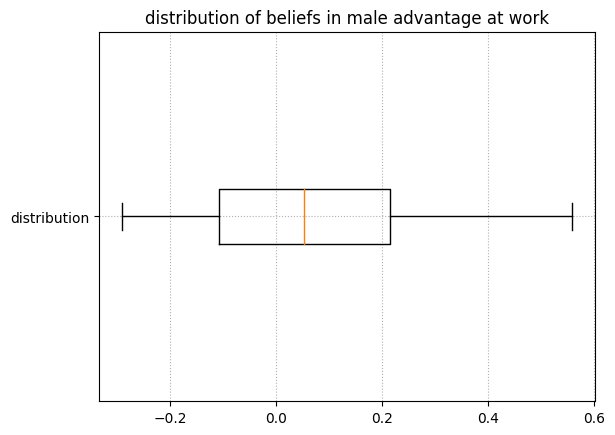

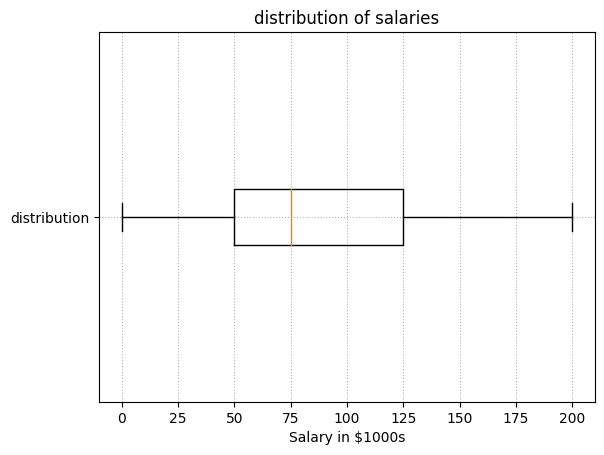

In [21]:
plt.boxplot(grouped_df, labels=['distribution'],vert=False)
plt.grid(linestyle=':')
plt.title('distribution of beliefs in male advantage at work')
plt.show()
plt.boxplot(df['salary_level'],labels=['distribution'],vert=False)
plt.title('distribution of salaries')
plt.xlabel('Salary in $1000s')
plt.grid(linestyle=':')
plt.show()

### The plots above show how the distribution of beliefs in male advantage skews slightly higher than the distribution of salaries in the data.

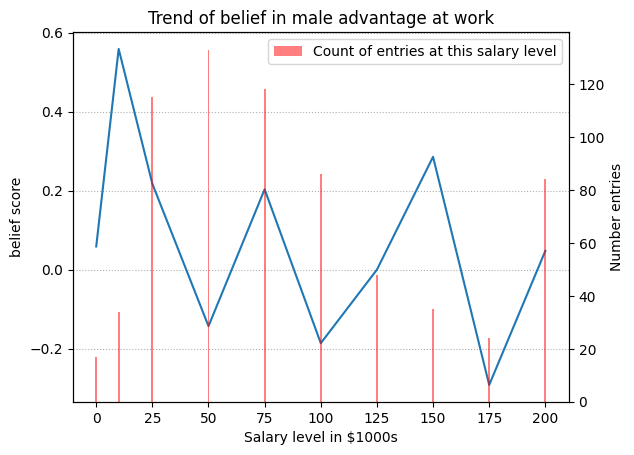

In [22]:
plt.plot(grouped_df.keys(), grouped_df,label='Trend in Belief of male advantage')
plt.xlabel('Salary level in $1000s')
plt.ylabel('belief score')
plt.grid(axis='y',linestyle=':')
plt.twinx()
plt.bar(grouped_df.keys(), df.groupby('salary_level').count()['salary'],alpha=0.5,label='Count of entries at this salary level',color='red')
plt.ylabel('Number entries')
plt.legend()
plt.title('Trend of belief in male advantage at work')
plt.show()

It is difficult to tell if there is a real trend. Reasons include there is not a significant enough amount of data and the distribution of people in each salary range. However the above chart may show that despite distribution showing belief should be less skewed than that for salary yet it seems instead it might skew the opposite way- showing there may be a faint trend.